If you put 1000 cows in a field with a perimeter fence, and build a bunch of interior fences such that each fence is always mid way between two cows, how many fences will each cow have around it (assuming each fence runs in a straight line).

The average number of fences around each cow is 5
The total number of fences built is approx 2440
The total length of the fences is approx 102 times the perimeter of the field.

fiddle
http://www.r-fiddle.org/#/fiddle?id=T1cuIISy



In [1]:
require(deldir)
set.seed(42)
x <- runif(1000)
y <- runif(1000)
z <- deldir(x,y,rw=c(0,1,0,1))
w <- tile.list(z)

Loading required package: deldir
deldir 0.1-9

     PLEASE NOTE:  The components "delsgs" and "summary" of the
 object returned by deldir() are now DATA FRAMES rather than
 matrices (as they were prior to release 0.0-18).
 See help("deldir").
 
     PLEASE NOTE: The process that deldir() uses for determining
 duplicated points has changed from that used in version
 0.0-9 of this package (and previously). See help("deldir").




In [5]:
?deldir

deldir {deldir},R Documentation
"x,y","The coordinates of the point set being triangulated. These can be given by two arguments x and y which are vectors or by a single argument x which is either a data frame or a generic list. If x is a data frame then the x coordinates of the points to be triangulated are taken to be the column of this data frame which is named “x” if there is one, else the first column of the data frame which is not named either “y” or “z”. The y coordinates are taken to be the column of this data frame which is named “y” if there is one, else the first column of the data frame which is not named either “x” or “x”. If there is a column named “z” and if the argument z is NULL, then this the column named “z” is taken to be the value of z. If x is a list (but not a data frame) then it must have components named x and y, and possibly a component named z. The x and y components give the x and y coordinates respectively of the points to be triangulated, and the component z if present (and if argument z is NULL) is taken to be the value of z (i.e. of a vector of “auxiliary” values or “weights” associated with the respective points)."
dpl,"A list describing the structure of the dummy points to be added to the data being triangulated. The addition of these dummy points is effected by the auxiliary function dumpts(). The list may have components: ndx: The x-dimension of a rectangular grid; if either ndx or ndy is null, no grid is constructed. ndy: The y-dimension of the aforementioned rectangular grid. nrad: The number of radii or “spokes”, emanating from each data point, along which dummy points are to be added. nper: The number of dummy points per spoke. fctr: A factor determining the length of each spoke; each spoke is of length equal to fctr times the mean nearest neighbour distance of the data. (This distance is calculated by the auxiliary function mnnd().) x: A vector of x-coordinates of “ad hoc” dummy points y: A vector of the corresponding y-coordinates of “ad hoc” dummy points"
rw,"The coordinates of the corners of the rectangular window enclosing the triangulation, in the order (xmin, xmax, ymin, ymax). Any data points (including dummy points) outside this window are discarded. If this argument is omitted, it defaults to values given by the range of the data, plus and minus 10 percent."
eps,"A value of epsilon used in testing whether a quantity is zero, mainly in the context of whether points are collinear. If anomalous errors arise, it is possible that these may averted by adjusting the value of eps upward or downward."
sort,"Logical argument; if TRUE (the default) the data (including dummy points) are sorted into a sequence of “bins” prior to triangulation; this makes the algorithm slightly more efficient. Normally one would set sort equal to FALSE only if one wished to observe some of the fine detail of the way in which adding a point to a data set affected the triangulation, and therefore wished to make sure that the point in question was added last. Essentially this argument would get used only in a de-bugging process."
plotit,Logical argument; if TRUE a plot is produced. The nature of the plot may be controlled by using the ... argument to pass appropriate arguments to plot.deldir(). Without “further instruction” a plot of the points being triangulated and of both the triangulation and the tessellation is produced;
digits,The number of decimal places to which all numeric values in the returned list should be rounded. Defaults to 6.
z,"An optional vector of “auxiliary” values or “weights” associated with the respective points. (NOTE: These “weights” are values associated with the points and hence with the tiles of the tessellation produced. They DO NOT affect the tessellation, i.e. the tessellation produced is the same as is it would be if there were no weights. The deldir package DOES NOT do weighted tessellation.) If this argument is left NULL then it is taken to be the third column of x, if x is a d

ERROR: Error in file(con, "rb"): cannot open the connection


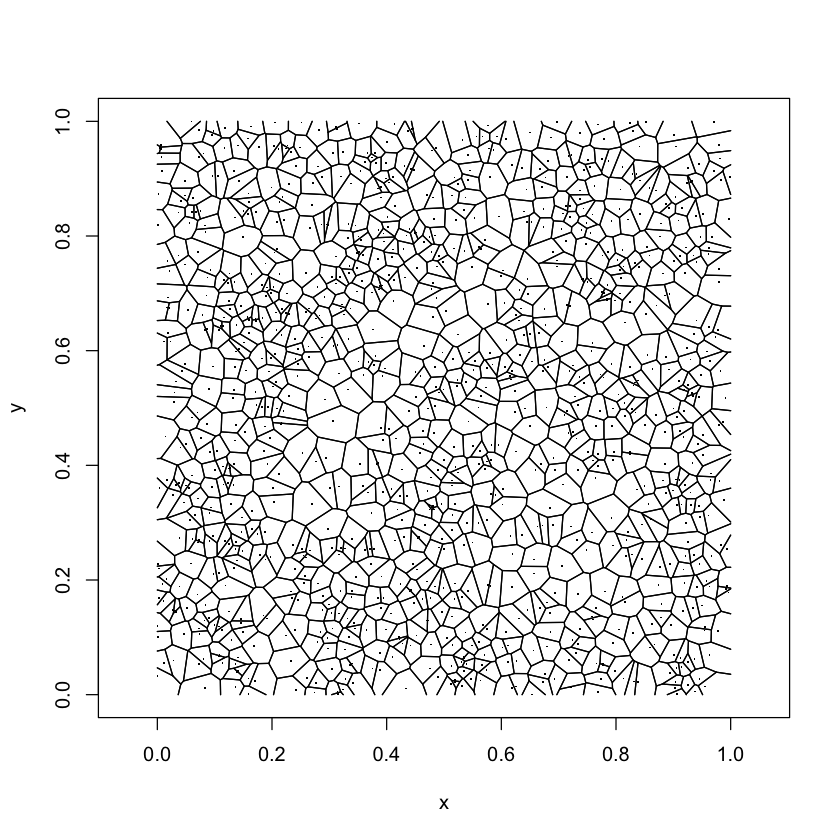

[1] "Total number of fences: 2442"

[1] "Total length of fences: 103 times perimeter of square field"

     sides            length       
 Min.   : 2.000   Min.   :0.02621  
 1st Qu.: 4.000   1st Qu.:0.33283  
 Median : 5.000   Median :0.72589  
 Mean   : 4.884   Mean   :0.82160  
 3rd Qu.: 6.000   3rd Qu.:1.20537  
 Max.   :10.000   Max.   :2.51615  

ERROR: Error in file(con, "rb"): cannot open the connection


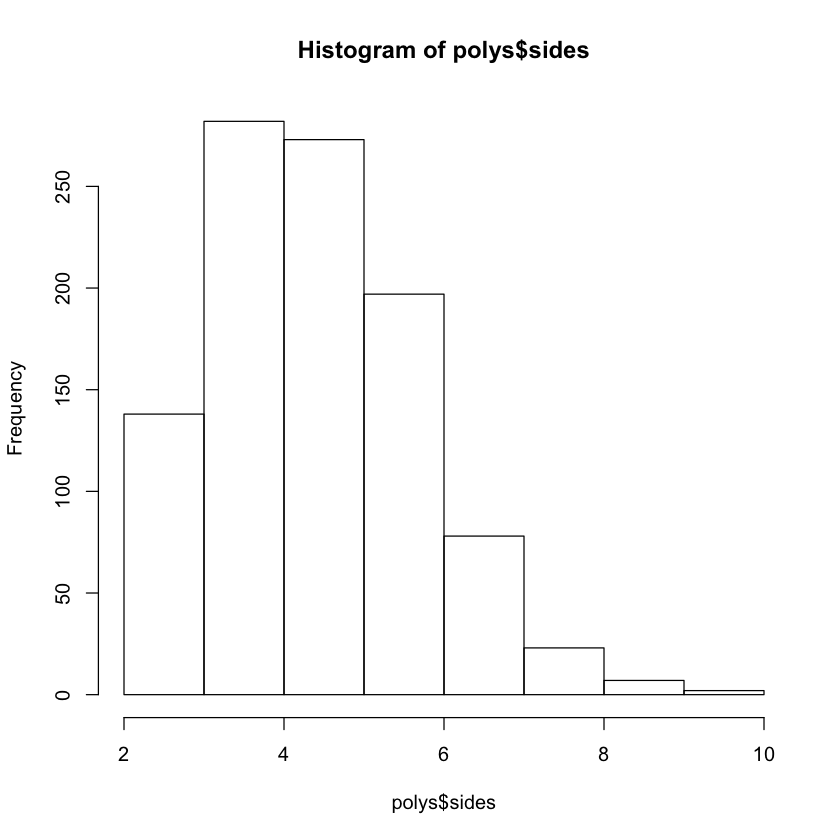

In [3]:
polys <- data.frame(sides = rep(0, length(w)), length = rep(0, length(w)))

for(i in 1:length(w)){
  
  x <- w[i][[1]]$x
  y <- w[i][[1]]$y
  
  polys$sides[i] <- length(w[i][[1]]$x) - 1
  polys$length[i] <- sqrt(sum((x - y) ^ 2))
  
}

#par(mfrow=c(1, 2))
plot(w, pch='.',xlim=c(0,1), ylim=c(0,1))
hist(polys$sides, max(polys$sides))
#par(mfrow=c(1, 1))

paste0('Total number of fences: ', sum(polys$sides)/2)
paste0('Total length of fences: ', round(sum(polys$length)/8,0), ' times perimeter of square field')

summary(polys)